# Yana Kaveramma A A
# 21BDA32

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report

In [66]:
df = pd.read_csv("C:/Users/Yana Areyada/Desktop/St.Josephs/BDA02/ML Lab/Lab 3/diabetes2.csv",encoding='cp1252')
#https://www.kaggle.com/datasets/kandij/diabetes-dataset

In [67]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [68]:
df. isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
(df.isna().sum()/435742)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [32]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [33]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
model_df = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [36]:
y = model_df.Outcome

In [47]:
model_df.Pregnancies.value_counts(normalize=True)
#model_df.Glucose.value_counts(normalize=True)
#model_df.BloodPressure.value_counts(normalize=True)
#model_df.SkinThickness.value_counts(normalize=True)
#model_df.Insulin.value_counts(normalize=True)
#model_df.BMI.value_counts(normalize=True)
#model_df.DiabetesPedigreeFunction.value_counts(normalize=True)
#model_df.Age.value_counts(normalize=True)
#With normalize set to True , returns the relative frequency by dividing all values by the sum of values

1     0.175781
0     0.144531
2     0.134115
3     0.097656
4     0.088542
5     0.074219
6     0.065104
7     0.058594
8     0.049479
9     0.036458
10    0.031250
11    0.014323
13    0.013021
12    0.011719
14    0.002604
15    0.001302
17    0.001302
Name: Pregnancies, dtype: float64

In [45]:
model_df.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [53]:
#model_df.groupby('Outcome')['Pregnancies'].describe()
#model_df.groupby('Outcome')['Glucose'].describe()
#model_df.groupby('Outcome')['SkinThickness'].describe()
#model_df.groupby('Outcome')['BloodPressure'].describe()
#model_df.groupby('Outcome')['Insulin'].describe()
#model_df.groupby('Outcome')['BMI'].describe()
#model_df.groupby('Outcome')['DiabetesPedigreeFunction'].describe()
model_df.groupby('Outcome')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,31.190000,11.667655,21.0,23.0,27.0,37.0,81.0
1,268.0,37.067164,10.968254,21.0,28.0,36.0,44.0,70.0


In [54]:
pd.get_dummies(data=model_df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Logistic Regression

In [55]:
model_df_final = pd.get_dummies(data=model_df, drop_first=True)

In [56]:
model_df_final.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [58]:
x= model_df_final[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = model_df_final['Outcome']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [60]:
clf = LogisticRegression(random_state=0)

In [61]:
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
clf.score(x_train, y_train)

0.7703583061889251

In [64]:
clf.score(x_test, y_test)

0.7597402597402597

### EDA

#### 1. Heatmap

In [91]:
#https://www.kaggle.com/code/kedharnatekar/diabetes-prediction-65-recall-77-accuracy

In [102]:
def heat_map(data,fig_size=(8,8)):

    fig, ax = plt.subplots(figsize=fig_size)
    heatmap = sns.heatmap(data,
                          square = True,
                          linewidths = .2,
                          cmap = 'YlGnBu',
                          cbar_kws = {'shrink': 0.8,'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1,
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 12})
    ax.set_yticklabels(data.columns, rotation = 0)
    ax.set_xticklabels(data.columns)

    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

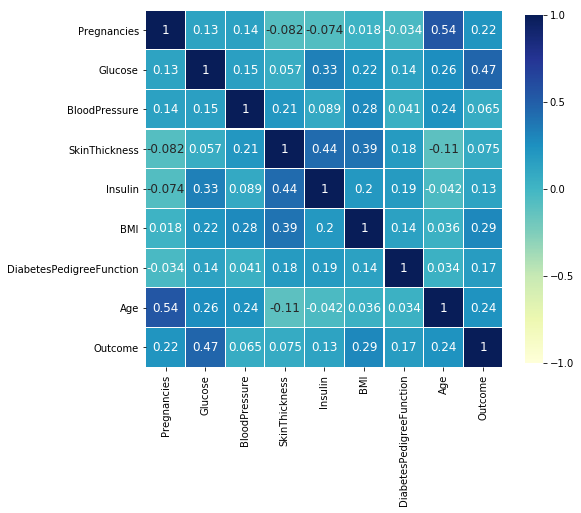

In [103]:
heat_map(df.corr())

In [105]:
# Heatmap shows there is no good correlation within features available. Hence there is no Multicollinerity.

#### 2. Pairplot

C:\Users\Yana Areyada\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


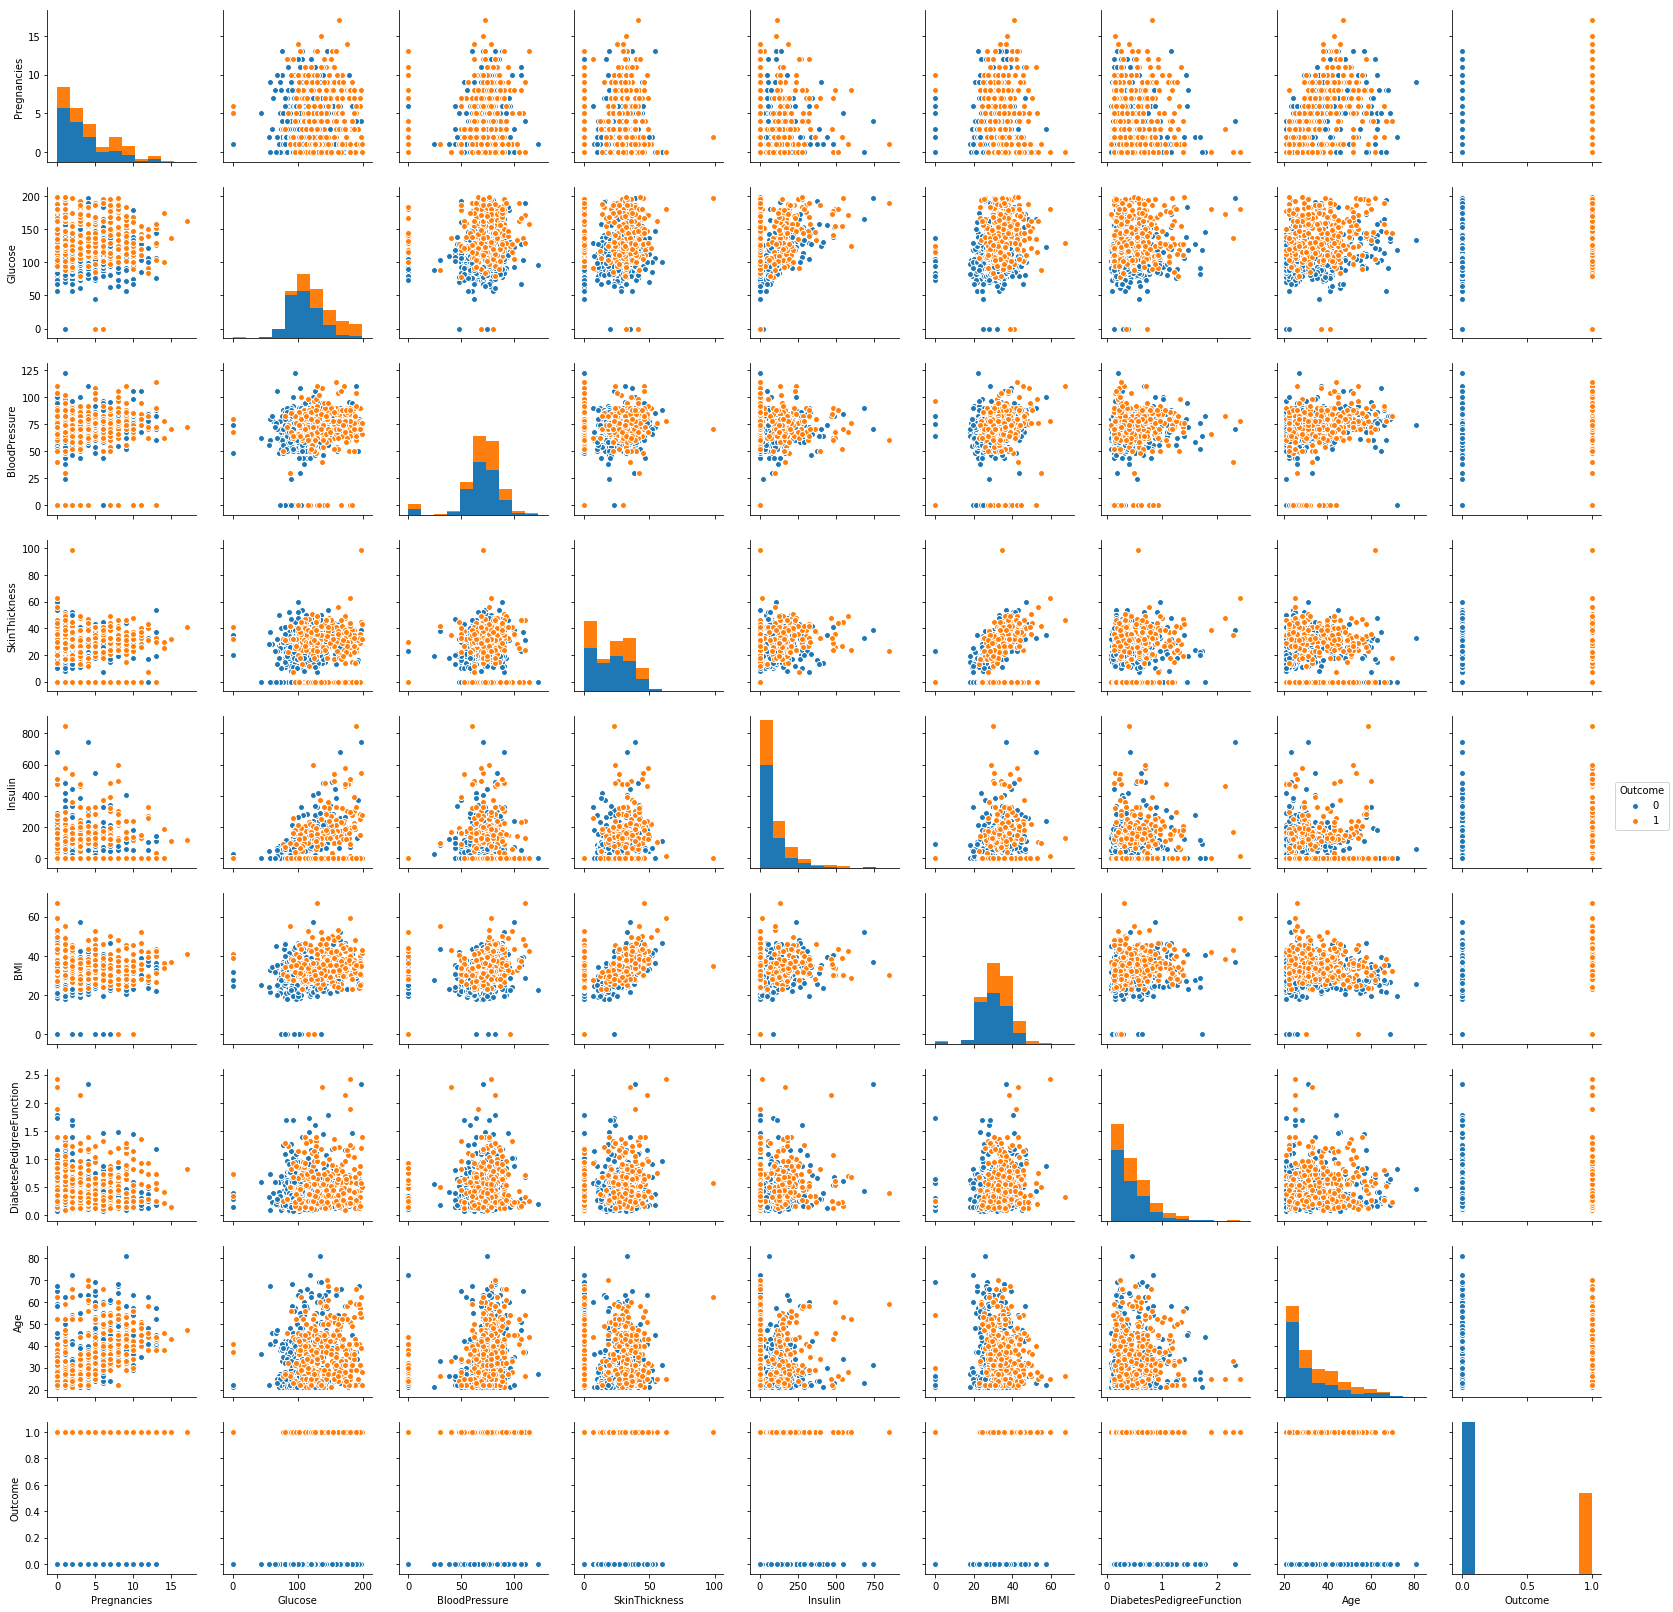

In [107]:
sns.pairplot(df,hue='Outcome')

In [108]:
# For all plots there is no proper way to differentiate Outcome 1 and 0 . i.e overlapping is clear.

#### 3. Logistic Regression Curve

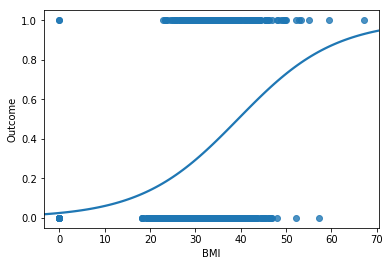

In [123]:
sns.regplot(x='BMI', y='Outcome', data=df, logistic=True, ci=None)

In [ ]:
#BMI below 35 is calculated as non diabetic

#### 4. Countplot

[Text(0.5,1,'Countplot for Age v/s Diabetes')]

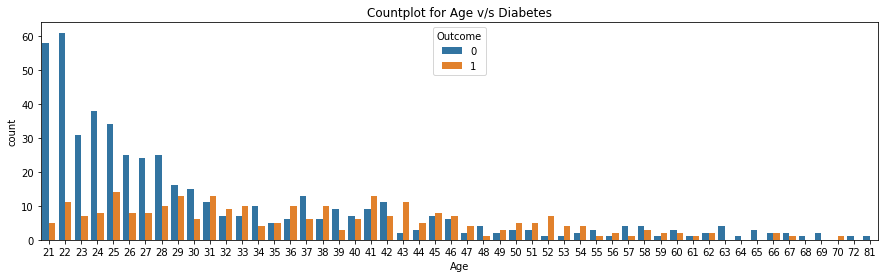

In [161]:
plt.figure(figsize=(15, 4))
sns.countplot(x="Age", hue="Outcome", data=df).set(title ="Countplot for Age v/s Diabetes")

In [ ]:
# Women in their 20s have a lesser chance of being diabetic.

### Confusion Matrix

In [82]:
knn = KNN(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [83]:
y_pred = knn.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [84]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[65 34]
 [20 35]]


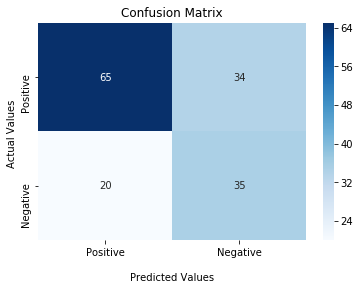

In [90]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Positive','Negative'])
ax.yaxis.set_ticklabels(['Positive','Negative'])

plt.show()

#https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

In [138]:
#https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd
tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
print("True Positives: ",tp)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Negatives: ",tn)

True Positives:  65
False Positives:  34
False Negatives:  20
True Negatives:  35


In [140]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
#print("Accuracy {:0.2f}%:",.format(Accuracy))
print(Accuracy)

64.93506493506493


### Precision

In [142]:
Precision = tp/(tp+fp) 
print(Precision)
#what you are saying is positive is actually positive
#https://www.youtube.com/watch?v=qWfzIYCvBqo

0.6565656565656566


### Recall

In [145]:
Recall = tp/(tp+fn) 
print(Recall)
#not missing out on positive values
#https://www.youtube.com/watch?v=qWfzIYCvBqo

0.7647058823529411


In [114]:
#True Positive (TP) — model correctly predicts the positive class (prediction and actual both are positive). In the above example, 65 people who have diabetes are predicted positively by the model.
#True Negative (TN) — model correctly predicts the negative class (prediction and actual both are negative). In the above example, 35 people who don’t have diabetes are predicted negatively by the model.
#False Positive (FP) — model gives the wrong prediction of the negative class (predicted-positive, actual-negative). In the above example, 34 people are predicted as positive of having a diabetes, although they are non diabetic. FP is also called a TYPE I error.
#False Negative (FN) — model wrongly predicts the positive class (predicted-negative, actual-positive). In the above example, 20 people who have tumors are predicted as negative. FN is also called a TYPE II error.

### f1 score

In [146]:
f1_score = (2*(precision*recall))/(precision+recall)
f1_score
#https://youtu.be/Z9NZY3ej9yY

0.7065217391304347

In [119]:
#print (classification_report(y_test,y_pred,digits=2))

### Sensitivity

In [147]:
#https://www.analyticsvidhya.com/blog/2021/06/classification-problem-relation-between-sensitivity-specificity-and-accuracy/
Sensitivity = tp/(tp+fn) 
print(Sensitivity)
#Recall and Sensitivity are one and the same.

0.7647058823529411


### Specificity

In [148]:
#https://www.analyticsvidhya.com/blog/2021/06/classification-problem-relation-between-sensitivity-specificity-and-accuracy/
specificity = tn/(tn+fp) 
specificity
#the proportion of true negatives that are correctly predicted by the model.

0.5072463768115942

### Misclassification Rate

In [149]:
# misclassification rate is a metric that tells us the percentage of observations that were incorrectly predicted by some classification model.
mis_rate = (fn+fp)/154
mis_rate

0.35064935064935066

In [150]:
accuracy = 1- 0.35064935064935066
accuracy

0.6493506493506493

### ROC

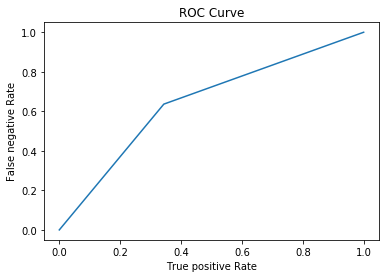

In [158]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred)
plt.title("ROC Curve")
plt.plot(fpr,tpr)
plt.xlabel("True positive Rate")
plt.ylabel("False negative Rate")
plt.show()
# graph showing the performance of a classification model at all classification thresholds

### AUROC

In [159]:
auc = metrics.roc_auc_score(y_test,y_pred)
print(auc)

0.6464646464646464


In [160]:
#Model is 64.64% accurate